# Pretrained Networks: Using MobileNet V2

we want to get a classification for the image `tram.jpg`

### Step 1: Read an image

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

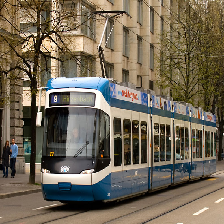

In [2]:
im = image.load_img('tram.jpeg', target_size=(224, 224))
im

In [3]:
a = image.img_to_array(im)
a = preprocess_input(a)

**Q: inspect the shape and data type of the numpy array and explain what you see**

In [4]:
a.shape

(224, 224, 3)

In [5]:
a.dtype

dtype('float32')

### Step 2: Load MobileNetV2

In [6]:
m = MobileNetV2()

14548992/14536120 [==============================] - 2s 0us/step


### Step 3: Prediction

In [9]:
from pprint import pprint

# reshape to (1,244,244,3)
a = a.reshape(1, 224, 224, 3)
p = m.predict(a)

# Decodes the prediction of an ImageNet mode
pprint(decode_predictions(p, 10))

[[('n04335435', 'streetcar', 0.9772159),
  ('n04487081', 'trolleybus', 0.005433312),
  ('n03895866', 'passenger_car', 0.00090320734),
  ('n02917067', 'bullet_train', 0.00037770325),
  ('n01755581', 'diamondback', 0.00014995146),
  ('n03769881', 'minibus', 0.00013872013),
  ('n03584254', 'iPod', 0.00012945759),
  ('n03272562', 'electric_locomotive', 0.000121992365),
  ('n03584829', 'iron', 0.00012178452),
  ('n01494475', 'hammerhead', 0.0001185629)]]


### Step 4: Intermediate output
We can visualize the intermediate output of each CNN layer, too!

In [10]:
from tensorflow.keras import Model

intermediate_layer_model = Model(inputs=m.input,
                                 outputs=[
                                     m.get_layer(index=2).output,
                                     m.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(a)
cnn2.shape, cnn100.shape

((1, 112, 112, 32), (1, 14, 14, 576))

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])

plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])

plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 0])

### Step 5: Try out another image
Make a prediction for your own image.
Use Pillow to cut out a square shape

In [17]:
#load the image from the path
im2 = image.load_img('hotdog.jpeg', target_size=(224,224))

#print the size of the image 
im2.size

(224, 224)

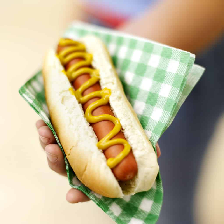

In [16]:
# resize the image to 224 by 224


# print the image
im2

In [25]:
# convert image to an array
b = image.img_to_array(im2)

# preprocess the input
b = preprocess_input(b)

# reshape the array to (1, 224, 224, 3)
b = b.reshape(1, 224, 224, 3)

# predict
pb = m.predict(b)

# print the top 5 predictions
pprint(decode_predictions(pb, 10))

[[('n07697537', 'hotdog', 0.94468063),
  ('n07697313', 'cheeseburger', 0.0042710765),
  ('n02666196', 'abacus', 0.0012675053),
  ('n07753113', 'fig', 0.00092521857),
  ('n03938244', 'pillow', 0.0009109982),
  ('n01955084', 'chiton', 0.00060237426),
  ('n03884397', 'panpipe', 0.0006018018),
  ('n07747607', 'orange', 0.000552183),
  ('n07684084', 'French_loaf', 0.00045797403),
  ('n07873807', 'pizza', 0.00045395375)]]


### Step 5: Try out InceptionV3
Try out the inceptionv3 network on the tram image

In [ ]:
#import the inceptionv3 network
# check https://keras.io/api/applications/inceptionv3/


In [ ]:
# instantiates the Inception v3 architecture


In [ ]:
# convert image to an array


# preprocess the input


# reshape the array to (1, 224, 224, 3)


# predict


# print the top 5 predictions
